In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import pandas as pd
from tqdm import tqdm

In [15]:
df = pd.read_csv('pbjam/data/prior_data.csv')
df = df[:5]
kics = [n for n in df.KIC]
numaxs = [[n, err] for n, err in zip(df.numax, df.numax_err)]
dnus = [[n, err] for n, err in zip(df.dnu, df.dnu_err)]
teffs = [[n, err] for n, err in zip(df.Teff, df.Teff_err)]
bp_rps = [[n, 0.1] for n in df.bp_rp]


In [18]:
# Initialize a jam session with a list of stars:
jam_sess = session(ID = kics, numax = numaxs, dnu = dnus, teff = teffs, bp_rp = bp_rps, nthreads=1)

In [19]:
for star in tqdm(jam_sess.stars):
    star.asymptotic_modeid(norders = 8)




  0%|          | 0/5 [00:00<?, ?it/s]

Burningham
Sampling





 20%|██        | 1/5 [01:22<05:31, 82.98s/it]

Burningham
Sampling





 40%|████      | 2/5 [02:25<03:50, 76.96s/it]

Burningham
Sampling





 60%|██████    | 3/5 [04:02<02:45, 82.82s/it]

Burningham
Sampling





 80%|████████  | 4/5 [05:26<01:23, 83.25s/it]

Burningham
Sampling





100%|██████████| 5/5 [06:46<00:00, 82.39s/it]

    ell      nu_mu    nu_std
0     2  44.376641  0.159928
1     0  44.711048  0.158689
2     2  50.409759  0.097866
3     0  50.742664  0.095842
4     2  56.501160  0.057494
5     0  56.835364  0.054009
6     2  62.655580  0.040202
7     0  62.987929  0.035100
8     2  68.867763  0.037089
9     0  69.199755  0.031567
10    2  75.139274  0.038199
11    0  75.471223  0.032955
12    2  81.469032  0.052462
13    0  81.802943  0.048844
14    2  87.860464  0.090275
15    0  88.197259  0.088264
{'numax': array([70.91669179, 71.6014404 , 71.98081431]), 'dnu': array([6.24312608, 6.26323095, 6.28410906]), 'eps': array([1.01030213, 1.04783166, 1.08539647]), 'alpha': array([0.00662384, 0.00952652, 0.01225765]), 'd02': array([0.31595595, 0.32862023, 0.35217027]), 'env_height': array([0.90039537, 0.92013746, 0.95475019]), 'env_width': array([20.62699585, 20.7515668 , 21.04446032]), 'mode_width': array([-1.51574793e-13,  3.82333511e-16,  1.70677270e-13]), 'teff': array([4840.41074057, 4928.36763704, 

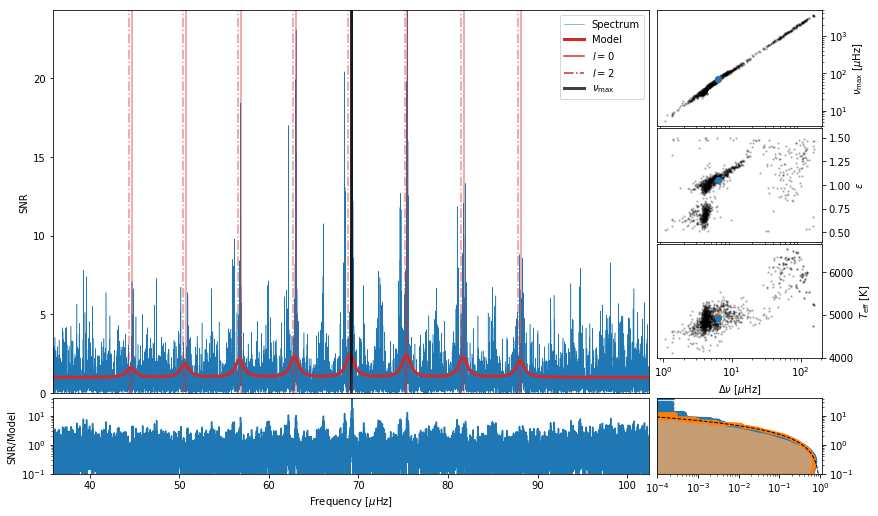

In [23]:
idx = 2
print(jam_sess.stars[idx].asy_modeID)
print(jam_sess.stars[idx].asy_bestfit)
fig = jam_sess.stars[idx].plot_asyfit()